In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the path to the folder containing the individual stock data files
path = 'individual_stocks_5yr'
# Create a list of company data file names
company_list = ['AAPL_data.csv', 'MSFT_data.csv', 'GOOGL_data.csv', 'AMGN_data.csv']

In [4]:
# Create an empty DataFrame to store the combined data
result = pd.DataFrame()
# Loop through each company data file and concatenate them into the result DataFrame
for company in company_list:
    curr_df = pd.read_csv(path+'/'+company)
    result = pd.concat([result, curr_df])

In [5]:
result

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  185.0000  186.8300  182.3300  185.5600    4078062  AMGN
1255  2018-02-02  183.4600  192.6000  183.0100  187.0100    7030078  AMGN
1256  2018-02-05  186.8200  188.5981  174.6200  174.7500    6922758  AMGN
1257  2018-02-06  177.9900  180.2800  172.0400  176.6500    7527691  AMGN
1258  2018-02-07  176.2500  180.9900  176.0000  177.4700    5715671  AMGN

[5036 rows x 7 columns]

In [6]:
result.shape

(5036, 7)

In [7]:
# Get a list of unique stock symbols (company names)
stc_list = result['Name'].unique()

In [13]:
result.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [15]:
# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])

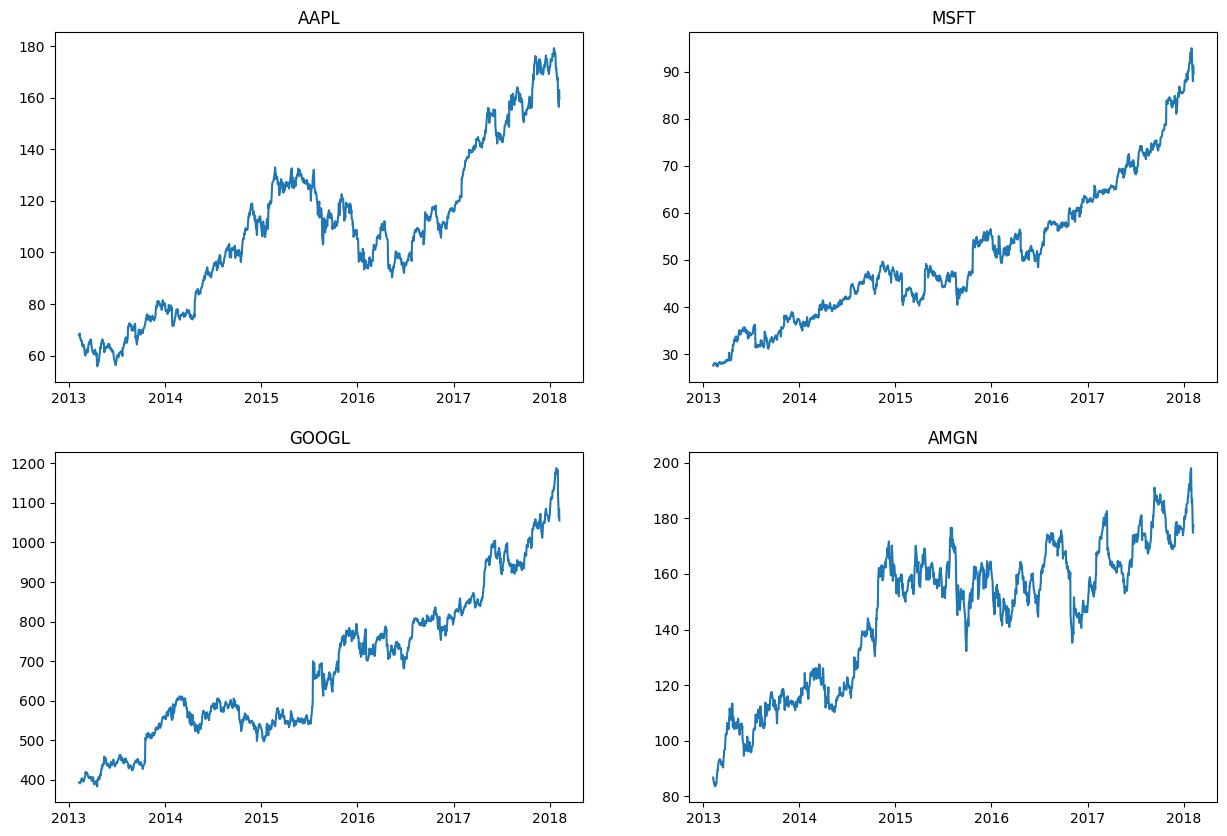

In [16]:
# Plot the closing prices of each stock over time using Matplotlib
plt.figure(figsize=(15, 10))
for i, company in enumerate(stc_list, 1):
    plt.subplot(2,2,i)
    df = result[result['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

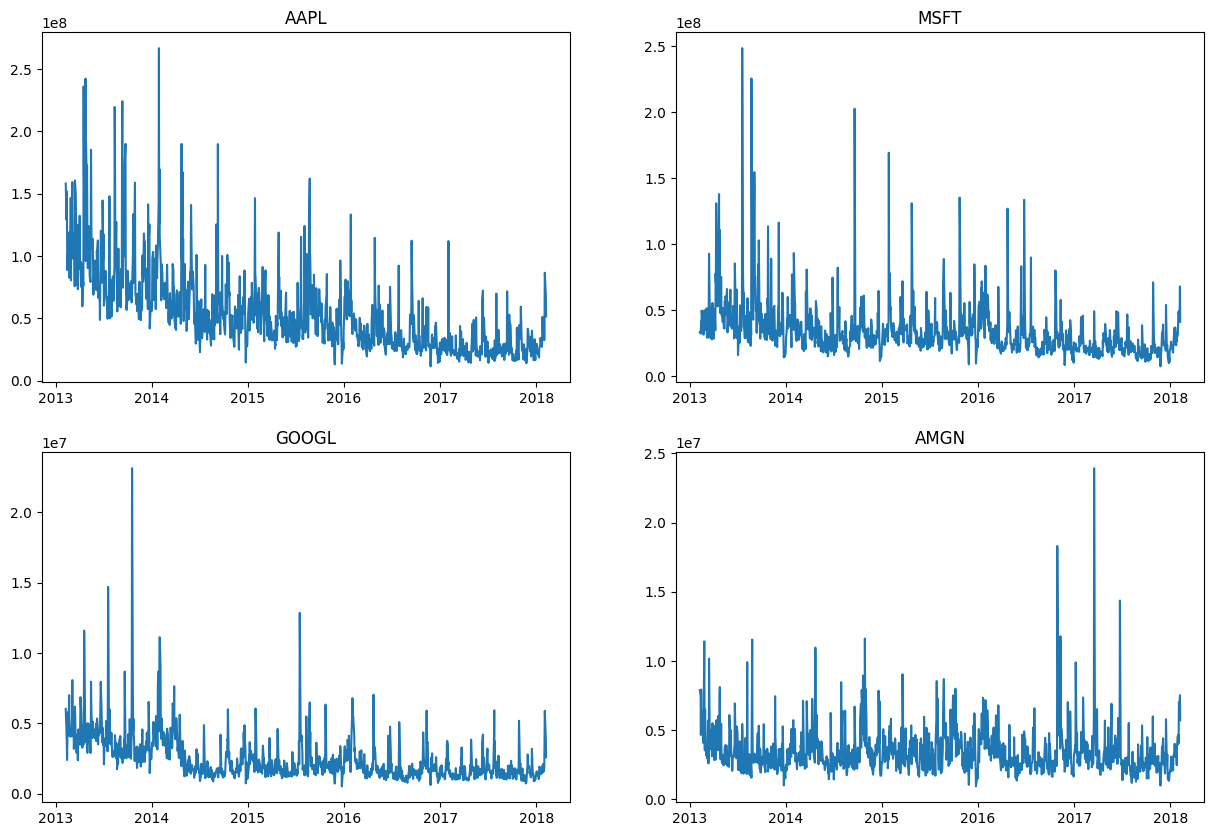

In [17]:
# Plot the trading volume of each stock over time using Matplotlib
plt.figure(figsize=(15, 10))
for i, company in enumerate(stc_list, 1):
    plt.subplot(2,2,i)
    df = result[result['Name'] == company]
    plt.plot(df['date'], df['volume'])
    plt.title(company)

In [18]:
import plotly.express as px

In [19]:
# Loop through each company in 'stc_list' and plot the trading volume using Plotly Express
for company in stc_list:
    df = result[result['Name'] == company]
    fig = px.line(df, x = 'date', y = 'volume', title=company)
    fig.show()

In [20]:
#daily price change = closing - opening
# %per = (daily price change / closing)*100
# Read the 'AAPL_data.csv' file into a DataFrame 'df'
df = pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
df

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [21]:
# Calculate daily price change as the difference between 'close' and 'open'
df['daily_price_returns'] = df['close'] - df['open']
df.head()

date     open     high      low    close     volume  Name   
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL  \
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_price_returns  
0               0.1400  
1               0.4900  
2              -1.6586  
3              -0.0286  
4               0.2957

In [22]:
# Calculate percentage daily price returns as a percentage of the closing price
df['%daily_price_returns'] = ((df['close'] - df['open'])/df['close'])*100
df.head()

date     open     high      low    close     volume  Name   
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL  \
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_price_returns  %daily_price_returns  
0               0.1400              0.206325  
1               0.4900              0.714688  
2              -1.6586             -2.481344  
3              -0.0286             -0.042869  
4               0.2957              0.443624

In [24]:
# Create a line plot using Plotly Express for 'date' vs. '%daily_price_returns'
fig = px.line(df, x = 'date', y='%daily_price_returns', title=' ')
fig.show()

In [25]:
# Create a copy of the DataFrame 'df' to avoid modifying the original data
df2 = df.copy()

In [27]:
df2.dtypes

date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
daily_price_returns     float64
%daily_price_returns    float64
dtype: object

In [28]:
# Convert the 'date' column to datetime format in the copied DataFrame 'df2'
df2['date'] = pd.to_datetime(df2['date'])

In [29]:
# Set the 'date' column as the index for the DataFrame 'df2'
df2.set_index('date', inplace=True)

In [30]:
df2.head()

open     high      low    close     volume  Name   
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL  \
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            daily_price_returns  %daily_price_returns  
date                                                   
2013-02-08               0.1400              0.206325  
2013-02-11               0.4900              0.714688  
2013-02-12              -1.6586             -2.481344  
2013-02-13              -0.0286             -0.042869  
2013-02-14               0.2957              0.443624

<Axes: xlabel='date'>

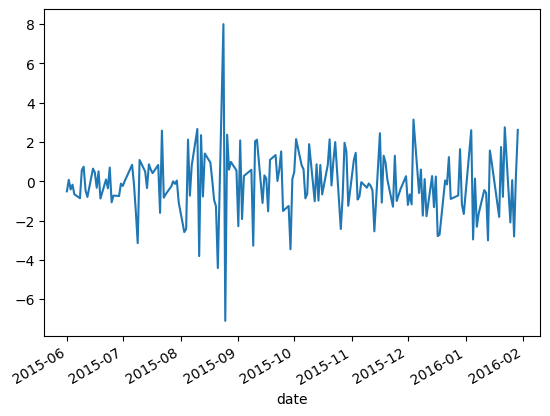

In [31]:
# Plot the '%daily_price_returns' data for the date range from '2015-06-01' to '2016-01-31'
df2['2015-06-01':'2016-01-31']['%daily_price_returns'].plot()

In [32]:
# Calculate the monthly mean of the 'close' column and resample the data
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

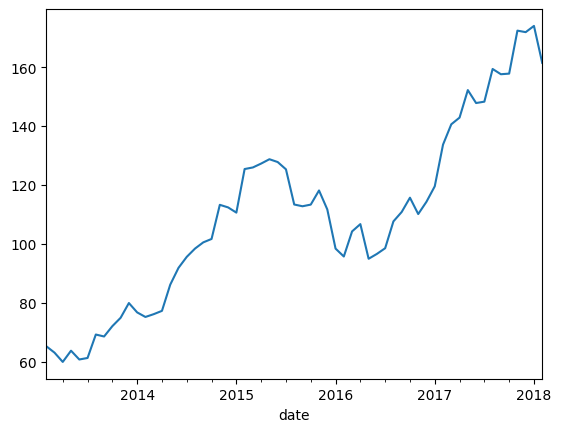

In [33]:
# Plot the monthly mean of the 'close' column
df2['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

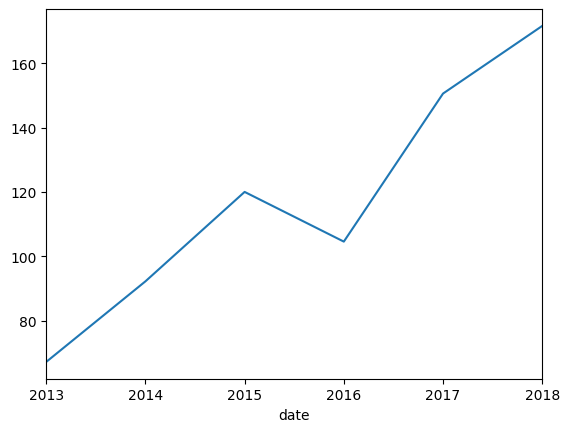

In [34]:
# Calculate the yearly mean of the 'close' column and resample the dataand also plot
df2['close'].resample('Y').mean().plot()

In [35]:
# Create an empty DataFrame 'close' to store the 'close' prices for each company
close = pd.DataFrame()
# Loop through each company in the list of unique stock symbols
for company in stc_list:
    df = result[result['Name']==company]
    close[company] = df['close']

In [36]:
close.head()

AAPL   MSFT     GOOGL   AMGN
0  67.8542  27.55  393.0777  86.77
1  68.5614  27.86  391.6012  84.92
2  66.8428  27.88  390.7403  84.54
3  66.7156  28.03  391.8214  84.94
4  66.6556  28.04  394.3039  84.72

C:\Users\ARJUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



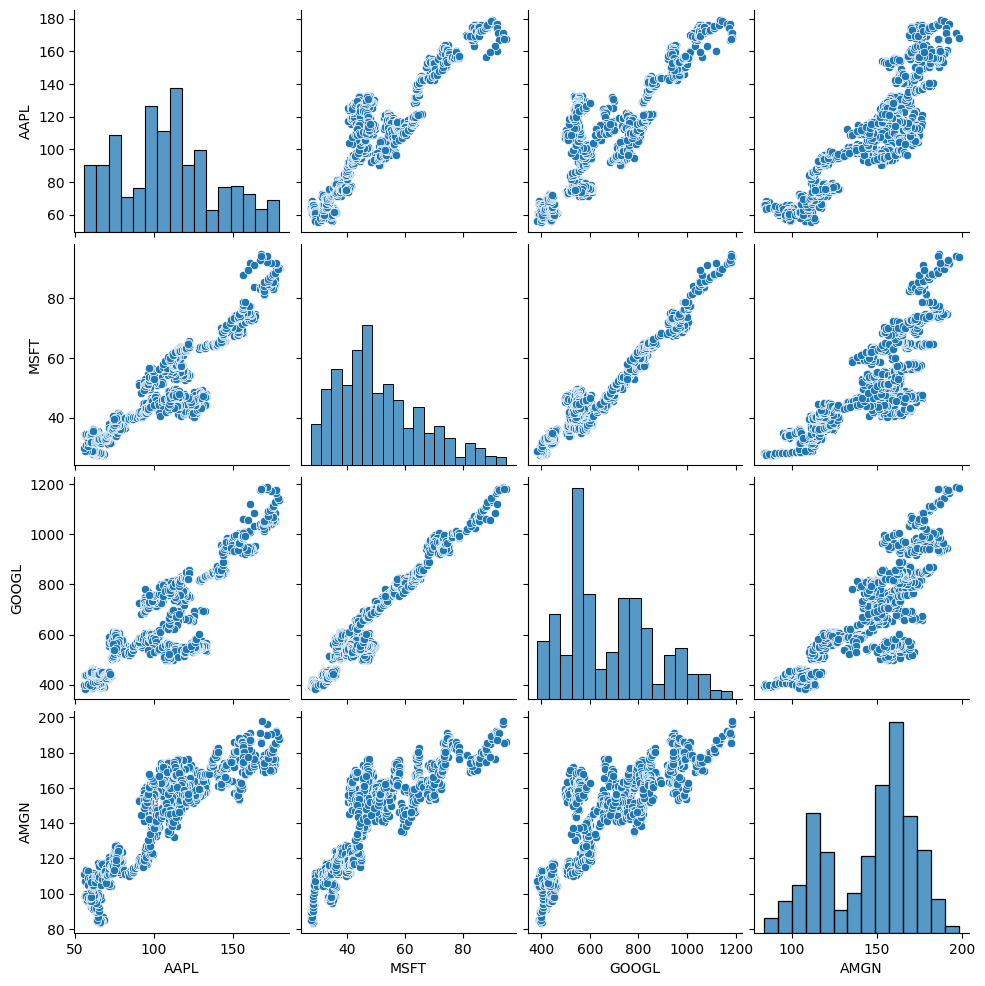

In [37]:
# Create a pairplot to visualize the relationships between 'close' prices for different companies
sns.pairplot(data=close)

<Axes: >

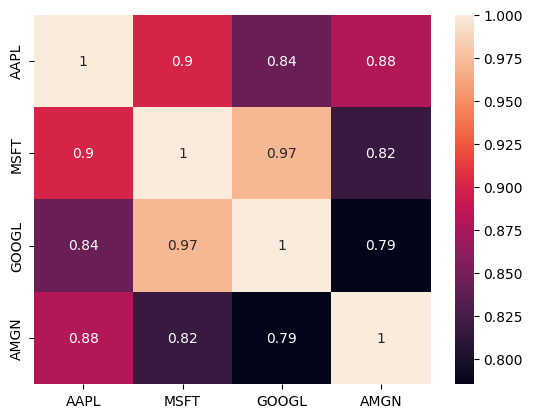

In [39]:
# Create a heatmap to visualize the correlation between 'close' prices for different companies
sns.heatmap(data=close.corr(), annot=True)

In [40]:
close = pd.DataFrame()
for company in stc_list:
    df = result[result['Name']==company]
    close[company] = ((df['close']-df['open'])/df['close'])*100

In [41]:
close.head()

AAPL      MSFT     GOOGL      AMGN
0  0.206325  0.725953  0.667196  1.336868
1  0.714688  0.753769  0.513788 -0.659444
2 -2.481344  0.000000 -0.134514 -0.544121
3 -0.042869  0.356761  0.348705 -0.023546
4  0.443624  0.427960  1.026873 -1.510859

C:\Users\ARJUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



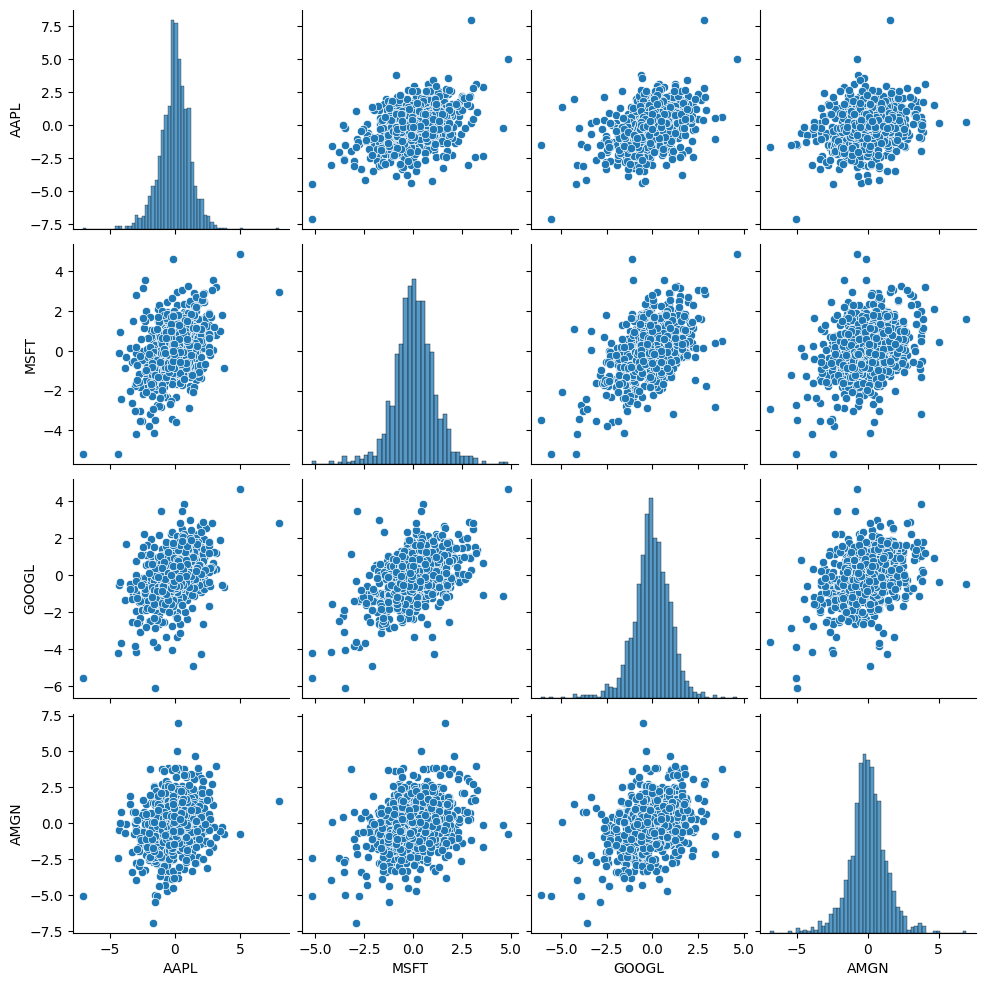

In [42]:
sns.pairplot(data=close)

<Axes: >

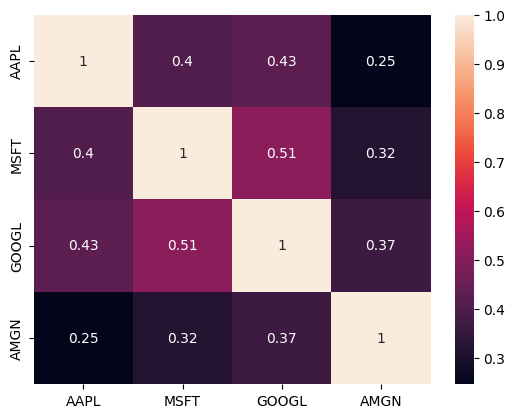

In [43]:
sns.heatmap(data=close.corr(), annot=True)

In [44]:
close.describe()

AAPL         MSFT        GOOGL         AMGN
count  1259.000000  1259.000000  1259.000000  1259.000000
mean     -0.000215     0.076404    -0.028349    -0.006999
std       1.187138     1.059260     1.052191     1.337707
min      -7.104299    -5.177618    -6.107290    -6.907010
25%      -0.658021    -0.509241    -0.575799    -0.704850
50%       0.042230     0.061069    -0.004508    -0.012964
75%       0.715427     0.703264     0.624730     0.731484
max       8.000388     4.861491     4.652214     6.948399